In [1]:
import numpy as np
from best_arm_algos import *
import matplotlib.pyplot as plt
from notebook_utils import *

%load_ext autoreload
%autoreload 2

## Part 1

### Section a)

#### b) Reproducing Results

In [6]:
means = [1,4/5,3/5,2/5,1/5,0]
deviations = [np.sqrt(1/4)]*6
h1 = compute_h1(means=means)

table_ae = get_avg_probabilities(action_elimination,means,deviations,n_runs=1000, n_steps = 800)
table_ucb = get_avg_probabilities(ucb,means,deviations,n_runs=1000, n_steps = 800)
table_lucb = get_avg_probabilities(lucb,means,deviations,n_runs=1000, n_steps = 800)

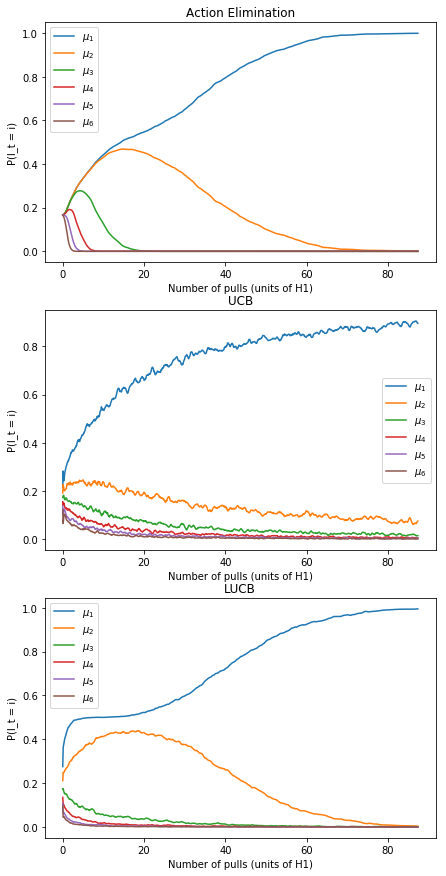

In [7]:
fig1, ax1 = plt.subplots(3,1, figsize=(7,15))

plot_table(ax1[0],table_ae,6, h1=h1/4, title='Action Elimination')
plot_table(ax1[1],table_ucb,6,h1=h1/4, title='UCB')
plot_table(ax1[2],table_lucb,6,h1=h1/4, title='LUCB')
fig1.savefig('Figures/reproduced_results.png')

#### c) 10-armed testbed (Sutton and Barto)

Note that for this experiment we did not sort the arms in decreasing order of their means. Thus the true best arm is four for this random seed.

In [11]:
np.random.seed(0)
means = np.random.normal(size = 10)
deviations = [1.0]*10
h1 = compute_h1(means = means)

In [19]:
table_ae = get_avg_probabilities(action_elimination,means,deviations,n_runs=1000, n_steps = 500 , n_arms=10)
table_ucb = get_avg_probabilities(ucb,means,deviations,n_runs=1000, n_steps = 500, n_arms=10)
table_lucb = get_avg_probabilities(lucb,means,deviations,n_runs=1000, n_steps = 500, n_arms=10)

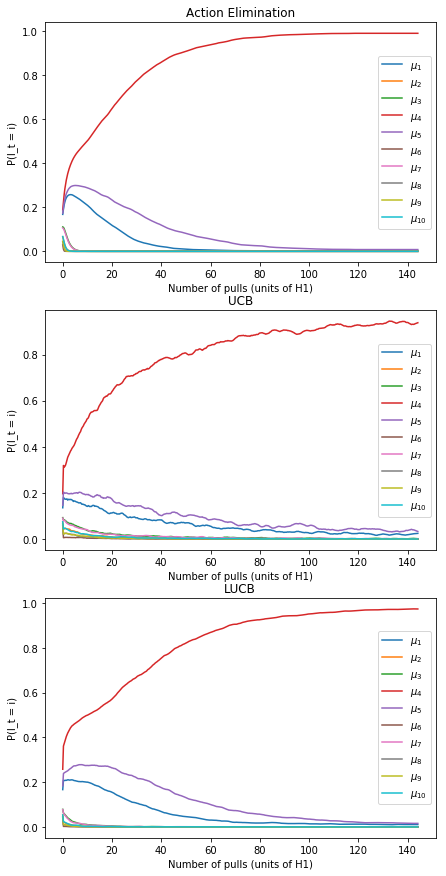

In [20]:
fig2, ax2 = plt.subplots(3,1, figsize=(7,15))

plot_table(ax2[0],table_ae,10, h1=h1/4, title='Action Elimination')
plot_table(ax2[1],table_ucb,10,h1=h1/4, title='UCB')
plot_table(ax2[2],table_lucb,10,h1=h1/4, title='LUCB')
fig2.savefig('Figures/ten_arm_testbed.png')